## pretrained Autoencoder

In [176]:
import numpy as np

### Load and normalize mnist data

In [177]:
from tensorflow.keras.datasets import mnist


# load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

# Flatten the images for a autoencoder input (28x28 is 784 -- therfore, input is 784 neurons)
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
print(train_images.shape)
print(test_images.shape)

# Normalize data - since it's grayscale, we can divide by 255 to get each pixel between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


In [178]:
type(test_images)

numpy.ndarray

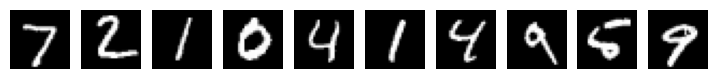

In [179]:
from matplotlib import pyplot as plt

n = 10
plt.figure(figsize=(9, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(test_images[i].reshape(28, 28), cmap="gray")
  ax.axis('off')

plt.show()

## Load trained 

In [180]:
from tensorflow import keras

pretrained_model = keras.models.load_model('initially_trained_autoencoder.h5')

313/313 [==============================] - 1s 4ms/step


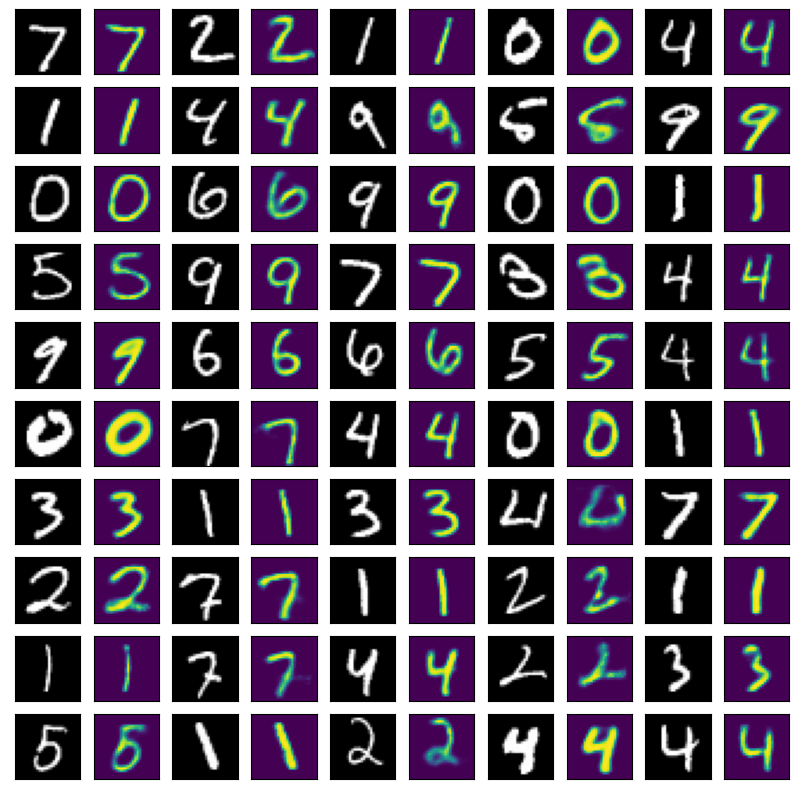

In [181]:
reconstructed_images = pretrained_model.predict(test_images)

images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

## Load our data

In [182]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image

m1 = tf.keras.utils.load_img('./data/m1.png', target_size=(28, 28), color_mode = "grayscale")
m2 = tf.keras.utils.load_img('./data/m2.png', target_size=(28, 28), color_mode = "grayscale")
m3 = tf.keras.utils.load_img('./data/m3.png', target_size=(28, 28), color_mode = "grayscale")
m4 = tf.keras.utils.load_img('./data/m4.png', target_size=(28, 28), color_mode = "grayscale")
m5 = tf.keras.utils.load_img('./data/m5.png', target_size=(28, 28), color_mode = "grayscale")

In [183]:
new_images = np.vstack([m1,m2,m3,m4,m5,])
test_m = new_images.reshape(-1, 784)
train_m = new_images.reshape(-1, 784)
train_m = train_m.astype('float32') / 255
test_m = test_m.astype('float32') / 255

In [184]:
test_m.shape

(5, 784)

## Oversampling

In [185]:
train_m = np.repeat(train_m[:],40,axis=0)

In [186]:
train_m.shape

(200, 784)

<function matplotlib.pyplot.show(close=None, block=None)>

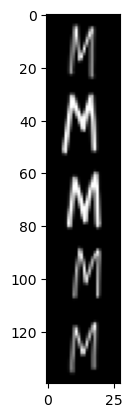

In [187]:
plt.imshow(new_images,cmap="gray")
ax.axis('off')
plt.show

### Create an autoencoder model.

In [188]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

input_dim = 28*28
latent_vec_len = 784 # this is the 'bottleneck' of the autoencoder

# Define the autoencoder architecture
# build the encoder
autoencoder = Sequential()
autoencoder.add(Input(shape=(input_dim,)))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(100, activation='relu'))

# the bottleneck layer
autoencoder.add(Dense(latent_vec_len, activation='relu'))

# the decoder layer
autoencoder.add(Dense(100, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(input_dim, activation='sigmoid'))

# Compile the autoencoder model
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

# Get summary
autoencoder.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_64 (Dense)            (None, 500)               392500    
                                                                 
 dense_65 (Dense)            (None, 300)               150300    
                                                                 
 dense_66 (Dense)            (None, 100)               30100     
                                                                 
 dense_67 (Dense)            (None, 784)               79184     
                                                                 
 dense_68 (Dense)            (None, 100)               78500     
                                                                 
 dense_69 (Dense)            (None, 300)               30300     
                                                                 
 dense_70 (Dense)            (None, 500)              

In [189]:
from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping during model training

Epoch 1/15
3/3 [==============================] - 1s 117ms/step - loss: 0.6886 - val_loss: 0.6476
Epoch 2/15
3/3 [==============================] - 0s 51ms/step - loss: 0.5874 - val_loss: 0.4115
Epoch 3/15
3/3 [==============================] - 0s 50ms/step - loss: 0.3953 - val_loss: 0.3325
Epoch 4/15
3/3 [==============================] - 0s 56ms/step - loss: 0.3052 - val_loss: 0.2948
Epoch 5/15
3/3 [==============================] - 0s 51ms/step - loss: 0.2945 - val_loss: 0.2949
Epoch 6/15
3/3 [==============================] - 0s 50ms/step - loss: 0.2879 - val_loss: 0.2796
Epoch 7/15
3/3 [==============================] - 0s 51ms/step - loss: 0.2735 - val_loss: 0.2709
Epoch 8/15
3/3 [==============================] - 0s 50ms/step - loss: 0.2643 - val_loss: 0.2646
Epoch 9/15
3/3 [==============================] - 0s 51ms/step - loss: 0.2602 - val_loss: 0.2650
Epoch 10/15
3/3 [==============================] - 0s 51ms/step - loss: 0.2600 - val_loss: 0.2629
Epoch 11/15
3/3 [===========

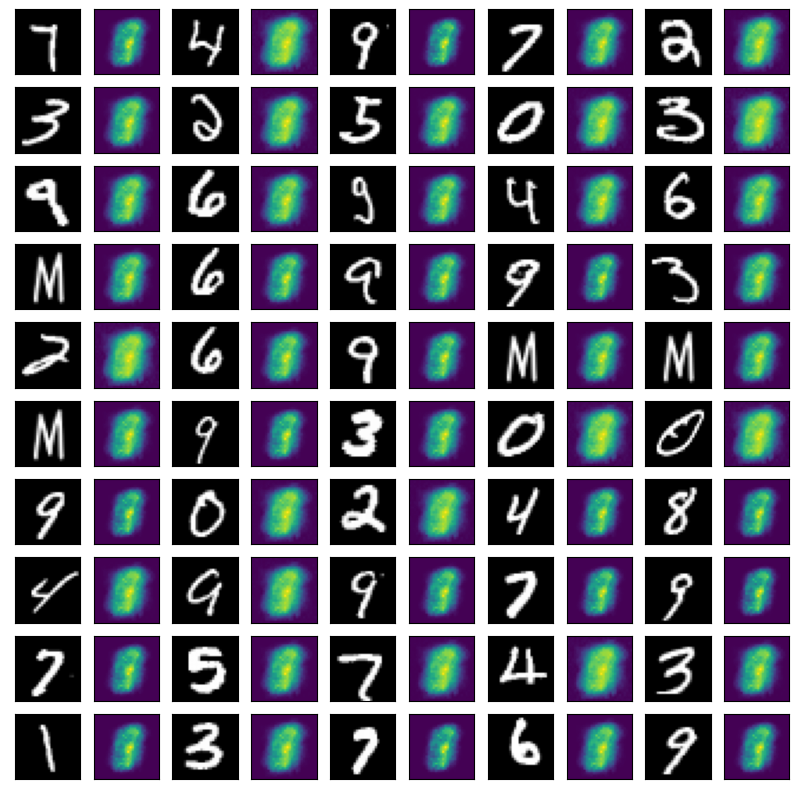

Epoch 1/15
3/3 [==============================] - 0s 78ms/step - loss: 0.2518 - val_loss: 0.2507
Epoch 2/15
3/3 [==============================] - 0s 77ms/step - loss: 0.2481 - val_loss: 0.2490
Epoch 3/15
3/3 [==============================] - 0s 58ms/step - loss: 0.2458 - val_loss: 0.2475
Epoch 4/15
3/3 [==============================] - 0s 55ms/step - loss: 0.2436 - val_loss: 0.2462
Epoch 5/15
3/3 [==============================] - 0s 53ms/step - loss: 0.2424 - val_loss: 0.2456
Epoch 6/15
3/3 [==============================] - 0s 54ms/step - loss: 0.2418 - val_loss: 0.2449
Epoch 7/15
3/3 [==============================] - 0s 55ms/step - loss: 0.2410 - val_loss: 0.2445
Epoch 8/15
3/3 [==============================] - 0s 56ms/step - loss: 0.2405 - val_loss: 0.2436
Epoch 9/15
3/3 [==============================] - 0s 54ms/step - loss: 0.2398 - val_loss: 0.2431
Epoch 10/15
3/3 [==============================] - 0s 53ms/step - loss: 0.2392 - val_loss: 0.2426
Epoch 11/15
3/3 [============

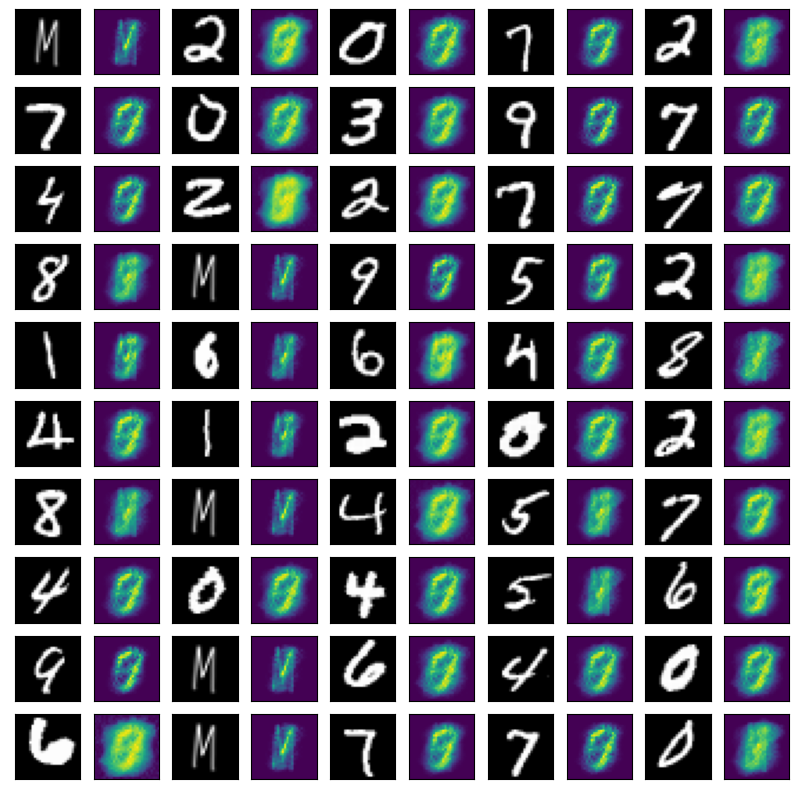

Epoch 1/15
3/3 [==============================] - 0s 76ms/step - loss: 0.2411 - val_loss: 0.2403
Epoch 2/15
3/3 [==============================] - 0s 52ms/step - loss: 0.2367 - val_loss: 0.2376
Epoch 3/15
3/3 [==============================] - 0s 57ms/step - loss: 0.2333 - val_loss: 0.2349
Epoch 4/15
3/3 [==============================] - 0s 54ms/step - loss: 0.2297 - val_loss: 0.2313
Epoch 5/15
3/3 [==============================] - 0s 55ms/step - loss: 0.2256 - val_loss: 0.2280
Epoch 6/15
3/3 [==============================] - 0s 54ms/step - loss: 0.2219 - val_loss: 0.2246
Epoch 7/15
3/3 [==============================] - 0s 55ms/step - loss: 0.2177 - val_loss: 0.2214
Epoch 8/15
3/3 [==============================] - 0s 53ms/step - loss: 0.2135 - val_loss: 0.2172
Epoch 9/15
3/3 [==============================] - 0s 54ms/step - loss: 0.2093 - val_loss: 0.2128
Epoch 10/15
3/3 [==============================] - 0s 52ms/step - loss: 0.2049 - val_loss: 0.2079
Epoch 11/15
3/3 [============

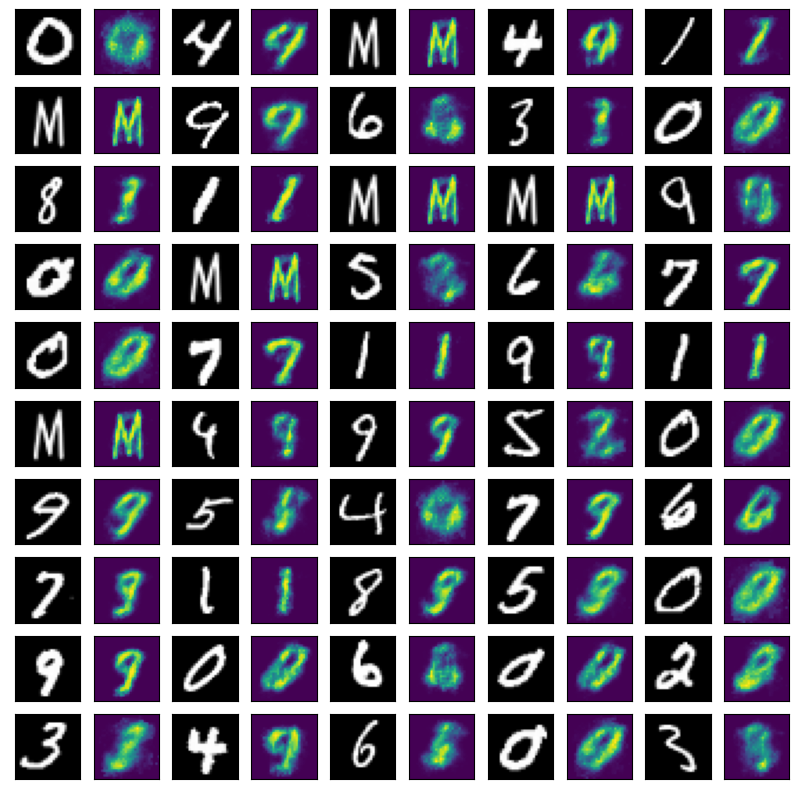

Epoch 1/15
3/3 [==============================] - 0s 85ms/step - loss: 0.2084 - val_loss: 0.2038
Epoch 2/15
3/3 [==============================] - 0s 57ms/step - loss: 0.2032 - val_loss: 0.1998
Epoch 3/15
3/3 [==============================] - 0s 62ms/step - loss: 0.1977 - val_loss: 0.1950
Epoch 4/15
3/3 [==============================] - 0s 62ms/step - loss: 0.1926 - val_loss: 0.1913
Epoch 5/15
3/3 [==============================] - 0s 61ms/step - loss: 0.1876 - val_loss: 0.1872
Epoch 6/15
3/3 [==============================] - 0s 59ms/step - loss: 0.1830 - val_loss: 0.1844
Epoch 7/15
3/3 [==============================] - 0s 56ms/step - loss: 0.1787 - val_loss: 0.1804
Epoch 8/15
3/3 [==============================] - 0s 57ms/step - loss: 0.1747 - val_loss: 0.1774
Epoch 9/15
3/3 [==============================] - 0s 55ms/step - loss: 0.1710 - val_loss: 0.1747
Epoch 10/15
3/3 [==============================] - 0s 57ms/step - loss: 0.1681 - val_loss: 0.1730
Epoch 11/15
3/3 [============

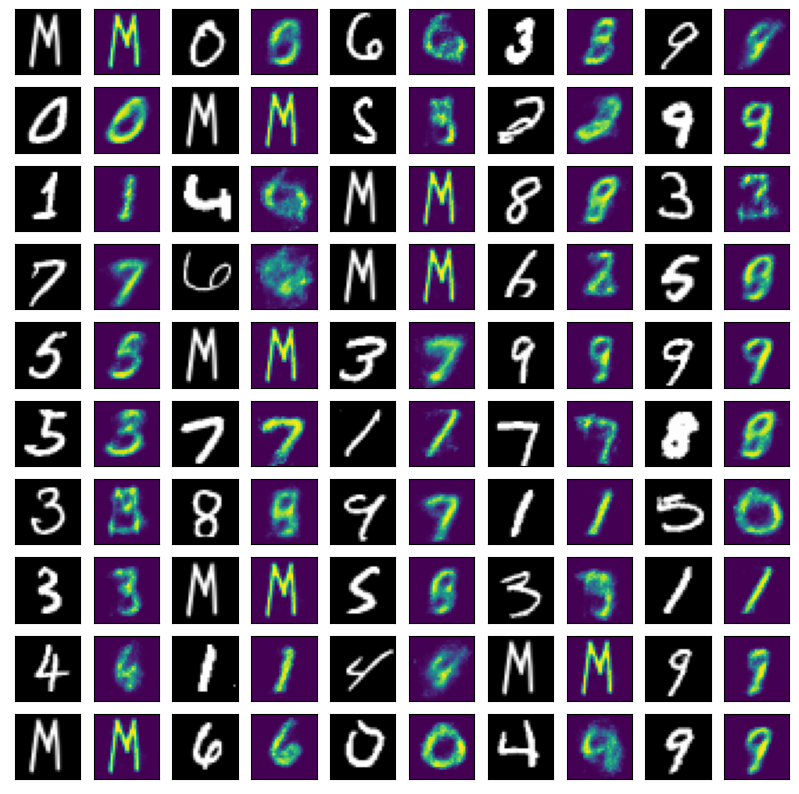

Epoch 1/15
3/3 [==============================] - 0s 84ms/step - loss: 0.1728 - val_loss: 0.1692
Epoch 2/15
3/3 [==============================] - 0s 60ms/step - loss: 0.1660 - val_loss: 0.1683
Epoch 3/15
3/3 [==============================] - 0s 58ms/step - loss: 0.1628 - val_loss: 0.1657
Epoch 4/15
3/3 [==============================] - 0s 59ms/step - loss: 0.1589 - val_loss: 0.1645
Epoch 5/15
3/3 [==============================] - 0s 59ms/step - loss: 0.1556 - val_loss: 0.1629
Epoch 6/15
3/3 [==============================] - 0s 55ms/step - loss: 0.1533 - val_loss: 0.1618
Epoch 7/15
3/3 [==============================] - 0s 59ms/step - loss: 0.1514 - val_loss: 0.1607
Epoch 8/15
3/3 [==============================] - 0s 58ms/step - loss: 0.1489 - val_loss: 0.1600
Epoch 9/15
3/3 [==============================] - 0s 55ms/step - loss: 0.1474 - val_loss: 0.1598
Epoch 10/15
3/3 [==============================] - 0s 55ms/step - loss: 0.1457 - val_loss: 0.1584
Epoch 11/15
3/3 [============

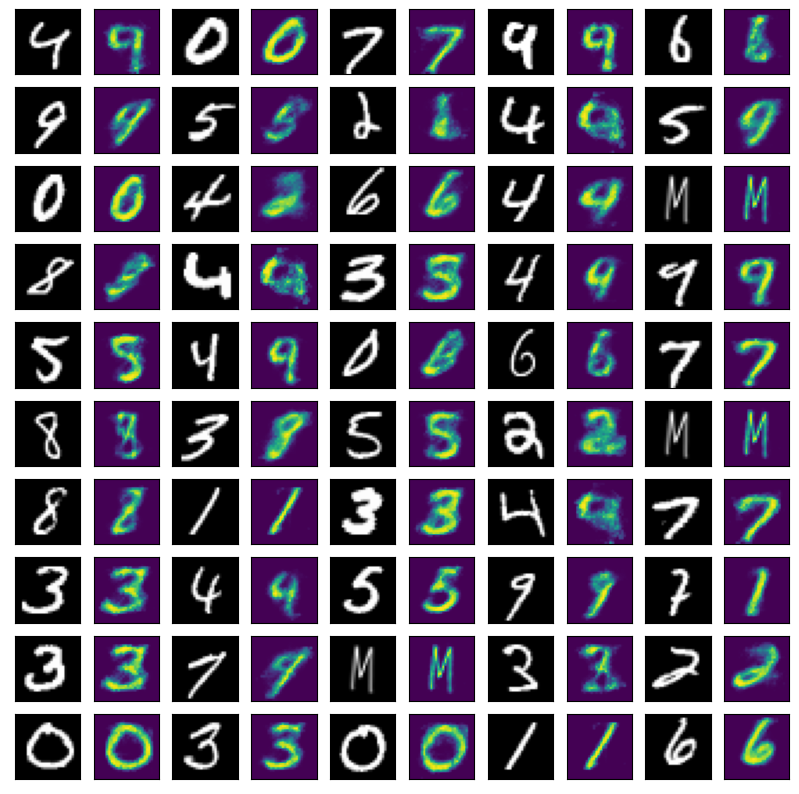

In [190]:
for i in range(5):
    if i >= len(train_m):
        break
    
    input_arr = train_m[i]
    input_arr = input_arr.reshape(784)
    np.random.shuffle(train_m)

    bad_images = [input_arr for _ in range(135)]
    new_image_set = np.vstack((train_images[:1500], bad_images))
    np.random.shuffle(new_image_set)
    new_images_train = new_image_set[int(len(new_image_set)*.8):]
    new_images_test = new_image_set[int(len(new_image_set)*.2):]
    #train
    early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
    history = autoencoder.fit(
    x=new_images_train, # For autoencoders, both the input and the target are the same
    y=new_images_train, 
    epochs=15, 
    batch_size=128,
    shuffle=True, 
    validation_data=(new_images_test, new_images_test),
    callbacks=[early_stop]
    )
    print('m-',i+1)
    #test
    reconstructed_images = autoencoder.predict(new_images_test)

    images = []
    for i in range(100):
        images.append(new_images_test[i].reshape(28,28))
        images.append(reconstructed_images[i].reshape(28,28))
    rows = 10
    cols = 10
    plt.figure(figsize=(10,10))
    for i in range(rows*cols):
        plt.subplot(rows,cols,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        if (i%2 == 0):
            plt.imshow(images[i],cmap='gray')
        else:
            plt.imshow(images[i])
    plt.show()
    

In [191]:
autoencoder.save('WE11_autoencoder.h5')

As the model is trained with both the datasets we can see that model is unable to predict both the mnist and our dataset correctly. So continued training might result in good results.